In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from random import sample
from sklearn.metrics import accuracy_score
import warnings
import random
import time
warnings.filterwarnings('ignore')

In [2]:
#Leo los datos de entrenamiento:
train = pd.read_csv('train.csv',  sep=',', names=["x", "y", "label"], header = 1)

In [3]:
#Leo los datos de test:
test = pd.read_csv('test.csv',  sep=',', names=["x", "y", "label"], header = 1)

In [4]:
train.shape

(319, 3)

In [5]:
test.shape

(79, 3)

In [6]:
train.groupby('label').count()

,x,y
label,,
-1.0,152,152
1.0,167,167


In [7]:
test.groupby('label').count()

,x,y
label,,
-1.0,35,35
1.0,44,44


In [8]:
test.head()

,x,y,label
1,0.390037,3.363184,1.0
2,0.162798,-0.892772,-1.0
3,-0.266684,1.834779,1.0
4,-1.433552,-2.683965,-1.0
5,-2.352588,-0.936111,-1.0


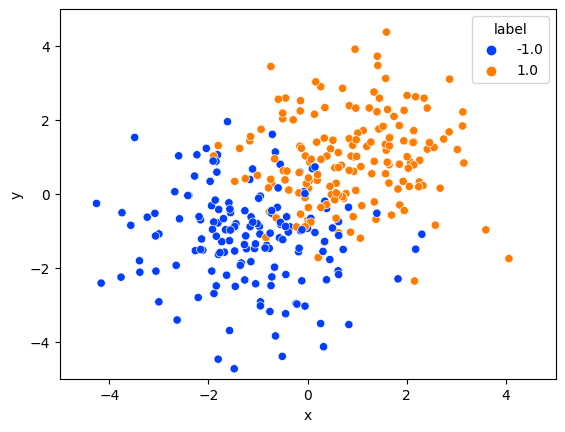

In [9]:
#Grafico las clases

sns.scatterplot(data=train, x="x", y="y", hue="label",palette="bright")
plt.ylim(-5, 5)
plt.xlim(-5, 5)

plt.show()

In [10]:
#Separo los datos de los lables.

X_train = train.to_numpy()[:,0:2]
y_train = train.to_numpy()[:,-1]

X_test = test.to_numpy()[:,0:2]
y_test = test.to_numpy()[:,-1]


In [11]:
def calculo_costo (W,b,X,Y,hyper_params):
    N = X.shape[0]
    
    t = 1 - (Y * (np.dot(X,W)+b))
    #Aplico el max(0,1-t)
    t[t<0] = 0
    #Calcula la hingen loss
    hinge_loss = hyper_params['C'] * np.sum(t)

    costo = (1 / 2 * np.dot(W,W) + hinge_loss) / N
    return costo

In [12]:
def calculo_gradiente(W,b,X,Y,hyper_params):
    t = 1 - Y * (np.dot(X,W)+b)
    t[t<0] = 0
    
    dw_total = np.zeros(len(W))
    db_total = 0
    
    cont = 0
    for  i in enumerate (t):
        if i==0:
            dw = W
            db = 0
        else:
            dw = W - hyper_params['C'] * X[cont] * Y[cont]
            db =  hyper_params['C'] * Y[cont]
        dw_total += dw
        db_total += db
        cont += 1
    dw_total = dw_total / cont
    db_total = db_total / cont


    grads = {'dw':dw_total, 'db':db_total}
    return grads


In [13]:
def momentum_update(W,b, grads, states, hyper_params):
  # hyper-param typical values: learning_rate=0.01, momentum=0.9
  
    W_ant = W
    b_ant = b
    W = W + hyper_params['momentum'] * states[0] - hyper_params['lr'] * grads['dw']
    b = b + hyper_params['momentum'] * states[1] - hyper_params['lr'] * grads['db']
    states = [W-W_ant, b-b_ant]
    return W,b, states

In [14]:
def creo_mini_batch(X,y,batch_size):
    X_batch =[]
    y_batch =[]
    numero_minibatch = 0
    for first in range(0, len(X), batch_size):
        X_subset = X[first:first+batch_size]
        y_subset = y[first:first+batch_size]
        X_batch.append(X_subset)
        y_batch.append(y_subset)
        numero_minibatch += 1
    return X_batch, y_batch, numero_minibatch

In [15]:
#inicializo hiperparámetros:
hyper_params = {'lr': 0.01, 'C': 0.05, 'momentum': 0.7}
max_epochs = 1000
cost_delta_minimo = 0.0001
batch_size = 50

#inicializo parámetros:
W = np.array([-5,0])
b = 0
dw = np.array([0,0])
states = [0,0]
lista_costo = []
costo_prev = 0
start = time.time()
lista_W = []
lista_b = []

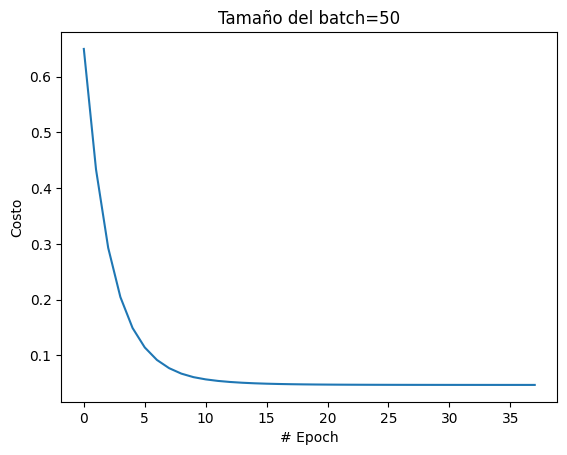

In [16]:
for epoch in range(1, max_epochs):
   
    X, y = X_train, y_train
    X , y, numero_minibatch = creo_mini_batch(X_train,y_train,batch_size)
    for i in range (numero_minibatch):
        grads = calculo_gradiente(W,b, X[i], y[i],hyper_params)
        W, b, states =  momentum_update(W,b, grads, states,hyper_params)
    costo = calculo_costo (W,b,X[i],y[i],hyper_params)
    lista_costo.append(costo)
    if abs(costo-costo_prev) < cost_delta_minimo * costo_prev:
        break
    costo_prev = costo
    
    lista_W.append(W)
    lista_b.append(b)
    
h0 = plt.plot(lista_costo)
plt.xlabel("# Epoch")
plt.ylabel("Costo")
plt.title("Tamaño del batch="+str(batch_size))
plt.savefig("costo"+"batch_size"+str(batch_size)+'_.png')
plt.show()




In [ ]:


sns.scatterplot(data=train, x="x", y="y", hue="label",palette="bright")

plt.legend(loc='upper right')
xx = np.linspace(-4,4)
a = -W[0] / W[1]
yy = a * xx + b / W[1]
h0 = plt.plot(xx, yy, 'k-',linewidth=1,color='red')
plt.ylim(-4, 4)
plt.savefig("train_GD_.png")
plt.show()

In [ ]:
#Implementación con sklern
from sklearn.svm import SVC
model = SVC(C=0.5, kernel='linear')
clf = model.fit(X_train, y_train)

In [ ]:
xx = np.linspace(-4,4)
w_scikit = clf.coef_[0]
a = -w_scikit[0] / w_scikit[1]
yy = a * xx - clf.intercept_[0] / w_scikit[1]

h0 = plt.plot(xx, yy, 'k-', linewidth=1,color='g')
sns.scatterplot(data=train, x="x", y="y", hue="label",palette="bright")
plt.legend(loc='upper right')
plt.ylim(-4, 4)
plt.savefig("sklearn_svm_test_"+'_.png')
plt.show()

In [ ]:
#Coparación valores obtenidos a través de SGD y scikit-learn:
m_sgd =-W[0]/W[1]
b_sgd = b/W[1]
print("W")
print ("Recta de decisión calculada por SGD: ","y= "+ str(m_sgd)+"x + "+str(b_sgd))


m_scikit =-w_scikit[0] / w_scikit[1]
b_scikit =-clf.intercept_[0]/w_scikit[1]
print ("Recta de decisión utilizando scikit-learn: ", "y= "+ str(m_scikit)+"x + "+str(b_scikit))

In [ ]:
#Recta calculado utilizando SGD:
sns.scatterplot(data=train, x="x", y="y", hue="label",palette="bright")


xx = np.linspace(-4,4)
a = -W[0] / W[1]
yy = a * xx + b / W[1]
plt.ylim(-4, 4)
h0 = plt.plot(xx, yy, 'k-',linewidth=1,color='red',label='SGD')

#Recta calculada utilizando SVM scikit-learn:
xx = np.linspace(-4,4)
w_scikit = clf.coef_[0]
a = -w_scikit[0] / w_scikit[1]
yy = a * xx - clf.intercept_[0] / w_scikit[1]
plt.ylim(-4, 4)
h1 = plt.plot(xx, yy, 'k-', linewidth=1,color='g',label='scikit-learn')
plt.legend(loc='upper right')
plt.savefig("ammbos_train_.png")
plt.show()


In [ ]:
#Precisión sobre set de entrenamiento utilizando GD:
y_predicted = []
a = -W[0] / W[1]
for i in range(X_train.shape[0]):
    y_linea = a * X_train[i][0] + b
    if X_train[i][1] > y_linea:
        y_predicted.append(1)
    else:
        y_predicted.append(-1)
print(confusion_matrix(y_train,y_predicted))


In [ ]:
#Predicción sobre set de entrenamiento utilizando scikit-learn:
y_pred = clf.predict(X_train)
print(confusion_matrix(y_train,y_pred))

In [ ]:
#Implementación con sklern
from sklearn.svm import SVC
model = SVC(C=0.9, kernel='linear')
clf = model.fit(X_train, y_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Creo una grilla para 

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Imprimo línea de decisión y margen
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])

# Imprimo vectores de soporte
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=0.5, facecolors='none', edgecolors='k')
ax.set_title("C=0.9" + "  N° Vectores soportes="+str(np.sum(clf.n_support_)))
plt.savefig("C=0.9" + "  N° Vectores soportes="+str(np.sum(clf.n_support_))+'_.png')
plt.show()

In [ ]:
#Precisión set de test utilizando SGD:

y_predecida = []
a = -W[0] / W[1]
for i in range(X_test.shape[0]):
    y_linea = a * X_test[i][0] + b
    if X_test[i][1] > y_linea:
        y_predecida.append(1)
    else:
        y_predecida.append(-1)
print(confusion_matrix(y_test,y_predecida))

In [ ]:
#Calculo la presición del modelo

precision = (79-5)/79
print("Precision del modelo="+ str(np.round (precision,decimals=4)))

In [ ]:
#Recta calculado utilizando SGD sobre set de test:

plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test)
xx = np.linspace(-4,4)
a = -W[0] / W[1]
yy = a * xx + b / W[1]
h0 = plt.plot(xx, yy, 'k-',linewidth=1,color='red')
sns.scatterplot(data=test, x="x", y="y", hue="label",palette="bright")
plt.legend(loc='upper right')
plt.ylim(-4, 4)
plt.savefig("test_"+str(W)+'_.png')
plt.show()

In [ ]:
#Predicción utilizando scikit-learn:
#Implementación con sklern
model = SVC(C=0.5, kernel='linear')
clf = model.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))

In [ ]:
precision = (79-6)/79
print("Precision del modelo="+ str(np.round (precision,decimals=4)))

In [ ]:
#Obtengo vectores soportes:
clf.support_

In [ ]:
X_train_delete = X_train
y_train_delete = y_train

In [ ]:
# Elimino vectores soportes y genero un nuevo set de entranamiento:
X_train_delete = np.delete(X_train,obj=
     [ 28,  29,  51,  53,  68,  70,  74,  76,  95, 106, 116, 117, 163,
        165, 173, 179, 180, 184, 198, 217, 246, 247, 248, 253, 256, 258,
        260, 265, 277, 279, 280, 289, 290, 305, 309, 312,  34,  44,  58,
         63,  66,  75,  78,  91,  98, 103, 110, 119, 128, 131, 134, 137,
        158, 183, 188, 189, 193, 200, 203, 296, 301, 308, 314, 318], axis=0)
y_train_delete = np.delete(y_train,obj=
        [ 28,  29,  51,  53,  68,  70,  74,  76,  95, 106, 116, 117, 163,
        165, 173, 179, 180, 184, 198, 217, 246, 247, 248, 253, 256, 258,
        260, 265, 277, 279, 280, 289, 290, 305, 309, 312,  34,  44,  58,
         63,  66,  75,  78,  91,  98, 103, 110, 119, 128, 131, 134, 137,
        158, 183, 188, 189, 193, 200, 203, 296, 301, 308, 314, 318], axis=0)


In [ ]:
#Implementación con sklern con el núevo set de datos:

from sklearn.svm import SVC
model = SVC(C=0.9, kernel='linear')
clf = model.fit(X_train_delete, y_train_delete)

plt.scatter(X_train_delete[:, 0], X_train_delete[:, 1], c=y_train_delete, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Imprimo línea de decisión y margen
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])

# Imprimo vectores de soporte
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=0.5, facecolors='none', edgecolors='k')
ax.set_title("C=0.9" + "  N° Vectores soportes="+str(np.sum(clf.n_support_)))
plt.savefig("C=0.9 SVS" + "  N° Vectores soportes="+str(np.sum(clf.n_support_))+'_.png')
plt.show()

In [ ]:
# Hago una prediccón sobre el set de datos de test
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))

In [ ]:
# Calculo la recta de desición:

w_scikit = clf.coef_[0]
a = -w_scikit[0] / w_scikit[1]
yy = a * xx - clf.intercept_[0] / w_scikit[1]
m_scikit =-w_scikit[0] / w_scikit[1]
b_scikit =-clf.intercept_[0]/w_scikit[1]
print ("Recta de decisión utilizando scikit-learn: ", "y= "+ str(m_scikit)+"x  "+str(b_scikit))

In [ ]:
X_train_delete = X_train
y_train_delete = y_train

In [ ]:
# Elimino observaciones que no son vectores de soportes:
X_train_delete = np.delete(X_train,obj=
     [  3,   6,   7,  20,  25,  71,  79,  80,  81,  82,  83,  84,
         85, 111, 112, 113, 114, 115, 120, 121, 122, 123, 124, 125, 207,
        208, 209, 210, 211, 213, 214, 215], axis=0)
y_train_delete = np.delete(y_train,obj=
       [  3,   6,   7,  20,  25,  71,  79,  80,  81,  82,  83,  84,
         85, 111, 112, 113, 114, 115, 120, 121, 122, 123, 124, 125, 207,
        208, 209, 210, 211, 213, 214, 215], axis=0)

In [ ]:
#Implementación con sklern utilizando el nuevo set de datos:
from sklearn.svm import SVC
model = SVC(C=0.5, kernel='linear')
clf = model.fit(X_train_delete, y_train_delete)

plt.scatter(X_train_delete[:, 0], X_train_delete[:, 1], c=y_train_delete, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Imprimo línea de decisión y margen
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])

# Imprimo vectores de soporte
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=0.5, facecolors='none', edgecolors='k')
ax.set_title("C=0.9 "  + "  N° Vectores soportes="+str(np.sum(clf.n_support_)))
plt.savefig("C=0.9 CVS" + "  N° Vectores soportes="+str(np.sum(clf.n_support_))+'_.png')
plt.show()

In [ ]:
# Hago una prediccón sobre el set de datos de test

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))

In [ ]:
# Calculo la recta de desición:

w_scikit = clf.coef_[0]
a = -w_scikit[0] / w_scikit[1]
yy = a * xx - clf.intercept_[0] / w_scikit[1]
m_scikit =-w_scikit[0] / w_scikit[1]
b_scikit =-clf.intercept_[0]/w_scikit[1]
print ("Recta de decisión utilizando scikit-learn: ", "y= "+ str(m_scikit)+"x + "+str(b_scikit))